In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree, model_selection, metrics

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
voice_data = pd.read_csv('/content/drive/MyDrive/Учёба/3 курс/Основы машинного обучения/ЛР2/dataset/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [45]:
voice_data.isnull().sum().sum()

np.int64(0)

In [46]:
X = voice_data.drop('label', axis=1)
y = voice_data['label']

In [47]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


## Задание 1

In [48]:
model = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

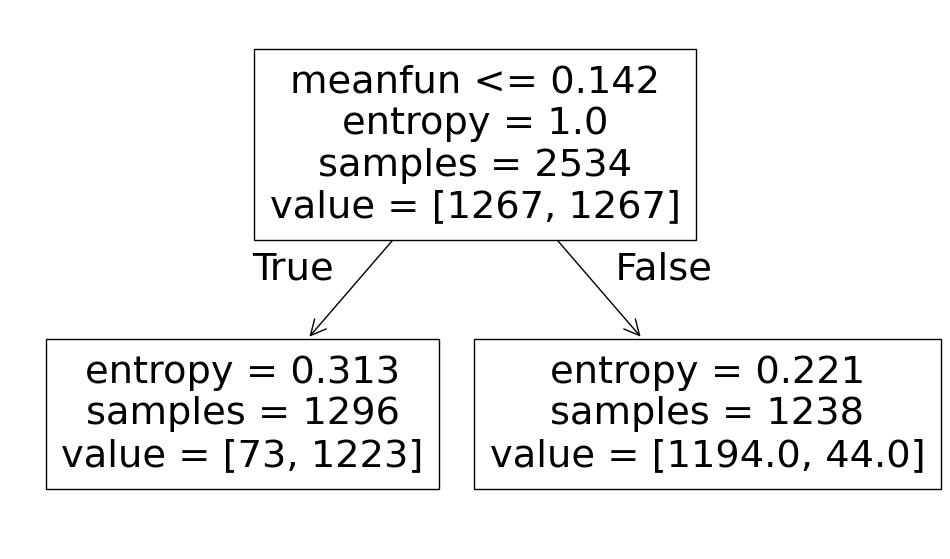

In [49]:
plt.figure(figsize=(12, 7))
tree.plot_tree(model, feature_names=X_train.columns)
plt.show()

### Вопросы

Решающее правило в корневой вершине будет построено на основе ```meanfun```

Оптимальное пороговое значение для данного фактора:

In [50]:
print(round(model.tree_.threshold[0], 3))

0.142


Процент наблюдений, для которых выполняется заданное в корневой вершине условие, содержится вобучающей выборке:

In [51]:
round((model.tree_.n_node_samples[1] / model.tree_.n_node_samples[0] * 100), 1)

np.float64(51.1)

In [52]:
prediction = model.predict(X_test)
acc = metrics.accuracy_score(y_test, prediction)
print("Значение метрики accuracy на тестовой выборке: ", round(acc, 3))

Значение метрики accuracy на тестовой выборке:  0.956


## Задание 2

In [53]:
model = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

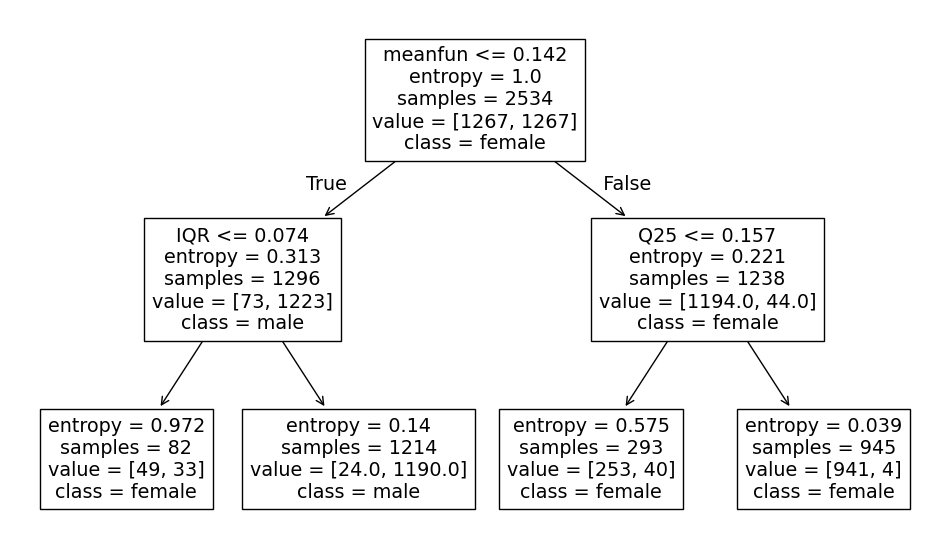

In [54]:
plt.figure(figsize=(12, 7))
tree.plot_tree(model, feature_names=X_train.columns, class_names=model.classes_)
plt.show()

### Вопросы

Из приведённых ниже факторов выберите те, что используются при построении данного
дерева решений:
- A meanfreq (средняя частота)
- B median (медианная частота)
- C IQR (межквартильный размах частот)
- D meanfun (средняя основная частота в акустическом спектре)
- E minfun (минимальная основная частота в акустическом спектре)
- F Q25 (первый квартиль частоты)

Ответ: A, C, F

Сколько листьев в построенном дереве содержат в качестве предсказания класс female?
Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью
функции plot_tree(), укажите параметр class_names=dt.classes_.


Ответ: 3

Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке


In [55]:
prediction = model.predict(X_test)
acc = metrics.accuracy_score(y_test, prediction)
print(round(acc, 3))

0.962


## Задание 3

In [56]:
model = tree.DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

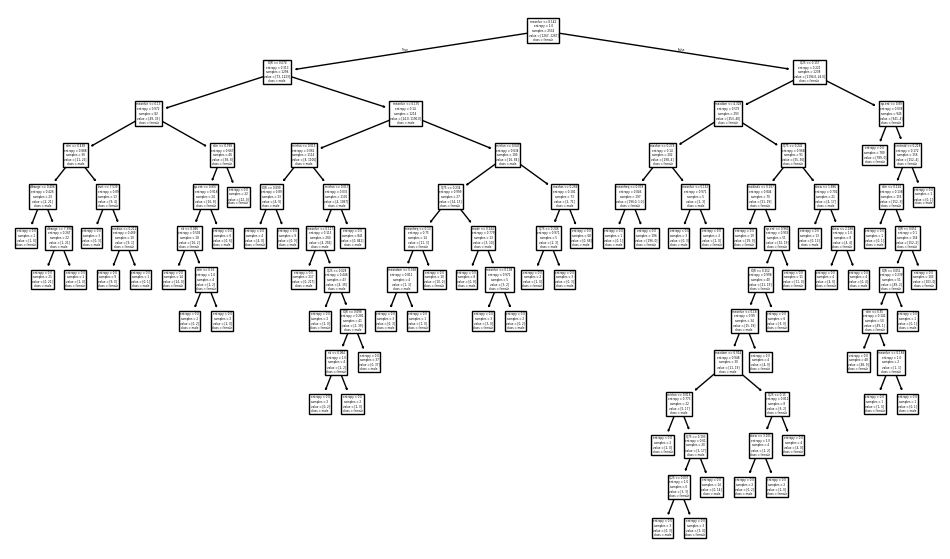

In [57]:
plt.figure(figsize=(12, 7))
tree.plot_tree(model, feature_names=X_train.columns, class_names=model.classes_)
plt.show()

In [58]:
print("Глубина полученного дерева решения: ", model.get_depth())
print("Количество листьев в полученном дереве решений: ", model.get_n_leaves())

Глубина полученного дерева решения:  12
Количество листьев в полученном дереве решений:  54


Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики
accuracy на каждой из выборок (отдельно на обучающей и тестовой)

In [59]:
prediction1 = model.predict(X_train)
prediction2 = model.predict(X_test)

print("Значение метрики accuracy на обучающей выборке: ", round(metrics.accuracy_score(y_train, prediction1), 2))
print("Значение метрики accuracy на тестовой выборке: ", round(metrics.accuracy_score(y_test, prediction2), 2))

Значение метрики accuracy на обучающей выборке:  1.0
Значение метрики accuracy на тестовой выборке:  0.97


## Задание 4

In [60]:
# Задаём сетку параметров
param_grid = {
'criterion': ['gini', 'entropy'], #критерий информативности
'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [61]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

In [62]:
tree_clas = tree.DecisionTreeClassifier(random_state=0)
grid_search = model_selection.GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=cv, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             verbose=True)

In [63]:
model = grid_search.best_estimator_

### Вопросы
Какой критерий информативности использует наилучшая модель?

In [64]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

Чему равна оптимальная найденная автоматически (с помощью GridSearchCV) максимальная
глубина?

In [65]:
model.get_depth()

7

Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?

3

С помощью наилучшей модели сделайте предсказание отдельно для обучающей и тестовой
выборок. Рассчитайте значение метрики accuracy на каждой из выборок.

In [66]:
prediction1 = model.predict(X_train)
prediction2 = model.predict(X_test)
print("Значение метрики accuracy на обучающей выборке: ", round(metrics.accuracy_score(y_train, prediction1), 3))
print("Значение метрики accuracy на тестовой выборке: ", round(metrics.accuracy_score(y_test, prediction2), 3))

Значение метрики accuracy на обучающей выборке:  0.996
Значение метрики accuracy на тестовой выборке:  0.97


## Задание 5

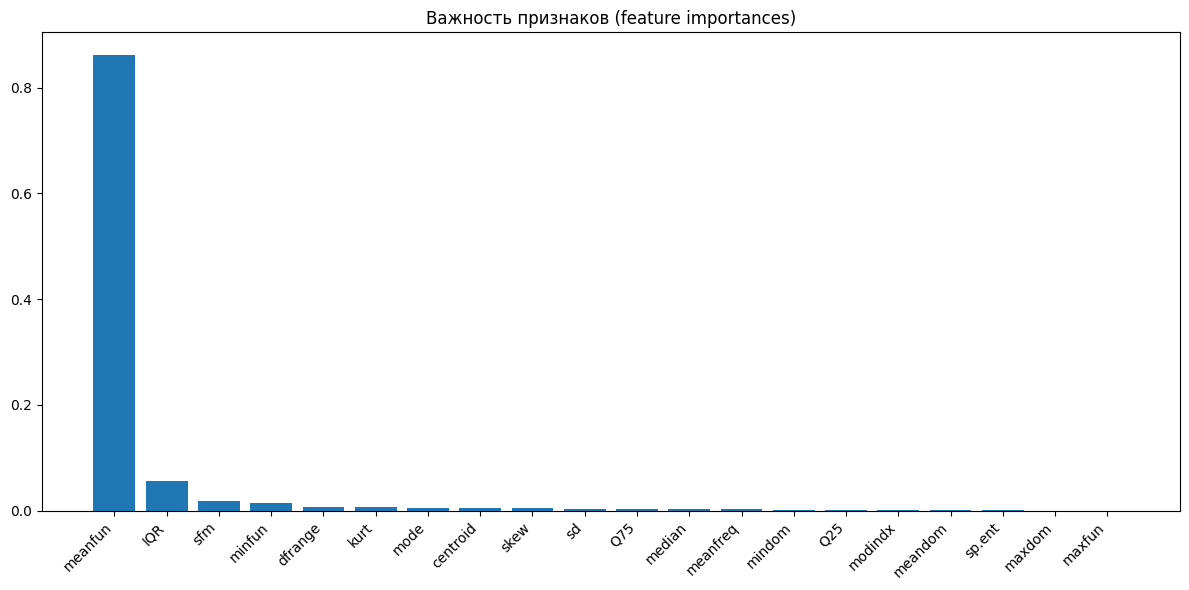

In [67]:
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Важность признаков (feature importances)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

Топ­ 3 наиболее важных факторов участвующих в построении дерева решений:

In [68]:
for i in range(3):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]}")

1. meanfun: 0.8613473628009526
2. IQR: 0.05681024375031138
3. sfm: 0.018004287903383286
